# Tag-less Classification
본 Notebook은 tag-less인 물체가 주변에 있는 8가지의 상황을 분류하는 task를 진행할 것임.  
상황은 모두 8가지, 9개의 데이터로, tag-anchor가 서로 통신하는 상화에서 주변(2m)에 있는 상황의 Cir data를 수집하였음.

In [1]:
import pandas as pd

## Data 불러오기

In [2]:
# 데이터 추출하기
def get_data(name, file):
    data = open(file, 'r')
    data_log = []

    for line in data:
        if len(line) > 1000:   # cir data를 갖는 line은 1016개의 데이터를 갖기에 1000개 이상의 데이터를 갖는 line만 추출
            data_log.append(line)

    print("len(data_log): ", len(data_log)) # 데이터 추출 개수 확인

    processed_data = []  # 데이터 처리를 위한 리스트

    for i in data_log:
        if any(c.isalpha() for c in i):
            index = i.find("RSMPL")  # CIR log가 생성되는 과정에서 끝부분이 RSMPL(01)로 끝나는 Line이 생성되는 경우가 있음
            # RSMPL이라는 문자를 찾지 못하면 -1을 반환
            if index != -1:
                i = i[index+len("RSMPL")+4:]  # RSMPL 다음의 4개의 문자를 제외한 데이터를 추출
                processed_data.append(i)
            else:
                # 문자열이 없는 경우 바로 추가
                processed_data.append(i)
        # 알파벳이 없는 경우 바로 추가
        else:
            processed_data.append(i)
    
    data_log = processed_data # 데이터 처리된 데이터를 data_log에 저장
    raw_data = []  # 데이터 처리를 위한 리스트
    for i in range(len(data_log)):
        data_sample = [int(x) for x in data_log[i].strip().split(",") if x]  # 데이터를 ,로 분리, int로 변환하여 list로 저장
        raw_data.append(data_sample)
    
    count = 0
    for i in range(len(raw_data)):
        if len(raw_data[i]) > 1016:
            count += 1
    
    print("not 1016: ", count)  # 1016개의 데이터를 갖지 않는 데이터 확인

    if count != 0:
        for i in range(len(raw_data)):
            if len(raw_data[i]) > 1016:
                raw_data[i] = raw_data[i][1016:]  # 1016개의 데이터를 넘는 경우 중첩된 경우이므로 후자를 선택

    count = 0
    for i in range(len(raw_data)):
        if len(raw_data[i]) != 1016:
            count += 1
    print("after: ",count)  # 잘 변경 되었는지 확인
    if count != 0:
        print("error, 잘못 처리된 데이터가 있습니다.")  # 없을거 같지만 그래도 만듦, 그래서 어딘지까지는 안 알려줌
        return

    raw_data = pd.DataFrame(raw_data)  # 데이터프레임으로 변환

    # CIR data를 절대값처리한 후 정규화한 형태로 변환
    abs_normalized_data = raw_data.abs()  
    abs_normalized_data = abs_normalized_data.apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=1)  # 정규화

    
    abs_normalized_data.to_csv(name)
    print(len(raw_data))

## 

log로부터 모든 data 추출하기

In [4]:
# get_data("지정하고 싶은 이름, "파일 이름")
get_data("data/R_anchor_2m_0m.csv", "20240819-203038_DecaWaveAllAccum_R_anchor_2m_0m.log")
get_data("data/R_anchor_2m_1_5m.csv", "20240819-210400_DecaWaveAllAccum_R_anchor_2m_1_5m.log")
get_data("data/R_tag_2m_0m.csv", "20240819-204659_DecaWaveAllAccum_R_tag_2m_0m.log")
get_data("data/R_tag_2m_1_5m.csv", "20240819-205521_DecaWaveAllAccum_R_tag_2m_1_5m.log")
get_data("data/L_anchor_2m_0m.csv", "20240819-211414_DecaWaveAllAccum_L_anchor_2m_0m.log")
get_data("data/L_anchor_2m_1_5m.csv", "20240819-213245_DecaWaveAllAccum_L_anchor_2m_1_5m.log")
get_data("data/L_tag_2m_0m.csv", "20240819-212655_DecaWaveAllAccum_L_tag_2m_0m.log")
get_data("data/L_tag_2m_1_5m.csv", "20240819-213858_DecaWaveAllAccum_L_tag_2m_1_5m.log")
get_data("data/ground_truth.csv", "20240819-214752_DecaWaveAllAccum_empty.log")

len(data_log):  583
not 1016:  3
after:  0
583
len(data_log):  803
not 1016:  9
after:  0
803
len(data_log):  634
not 1016:  3
after:  0
634
len(data_log):  783
not 1016:  3
after:  0
783
len(data_log):  799
not 1016:  6
after:  0
799
len(data_log):  686
not 1016:  12
after:  0
686
len(data_log):  630
not 1016:  10
after:  0
630
len(data_log):  648
not 1016:  3
after:  0
648
len(data_log):  709
not 1016:  10
after:  0
709


In [7]:
# data 불러오기
ra20 = pd.read_csv("data/R_anchor_2m_0m.csv", index_col=0)
ra215 = pd.read_csv("data/R_anchor_2m_1_5m.csv", index_col=0)
rt20 = pd.read_csv("data/R_tag_2m_0m.csv", index_col=0)
rt215 = pd.read_csv("data/R_tag_2m_1_5m.csv", index_col=0)
la20 = pd.read_csv("data/L_anchor_2m_0m.csv", index_col=0)
la215 = pd.read_csv("data/L_anchor_2m_1_5m.csv", index_col=0)
lt20 = pd.read_csv("data/L_tag_2m_0m.csv", index_col=0)
lt215 = pd.read_csv("data/L_tag_2m_1_5m.csv", index_col=0)
empty = pd.read_csv("data/ground_truth.csv", index_col=0)

## 500개씩 중첩하여 시각화

In [8]:
print("ra20: ", ra20.shape)
print("ra215: ", ra215.shape)
print("rt20: ", rt20.shape)
print("rt215: ", rt215.shape)
print("la20: ", la20.shape)
print("la215: ", la215.shape)
print("lt20: ", lt20.shape)
print("lt215: ", lt215.shape)
print("empty: ", empty.shape)

ra20:  (583, 1016)
ra215:  (803, 1016)
rt20:  (634, 1016)
rt215:  (783, 1016)
la20:  (799, 1016)
la215:  (686, 1016)
lt20:  (630, 1016)
lt215:  (648, 1016)
empty:  (709, 1016)


전체적으로 실험 환경에 의한 오류 방지를 위해 앞, 뒤 20개씩 제거한 후 사용하겠음

In [12]:
ra20 = ra20[20:-20]
ra215 = ra215[20:-20]
rt20 = rt20[20:-20]
rt215 = rt215[20:-20]
la20 = la20[20:-20]
la215 = la215[20:-20]
lt20 = lt20[20:-20]
lt215 = lt215[20:-20]
empty = empty[20:-20]

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

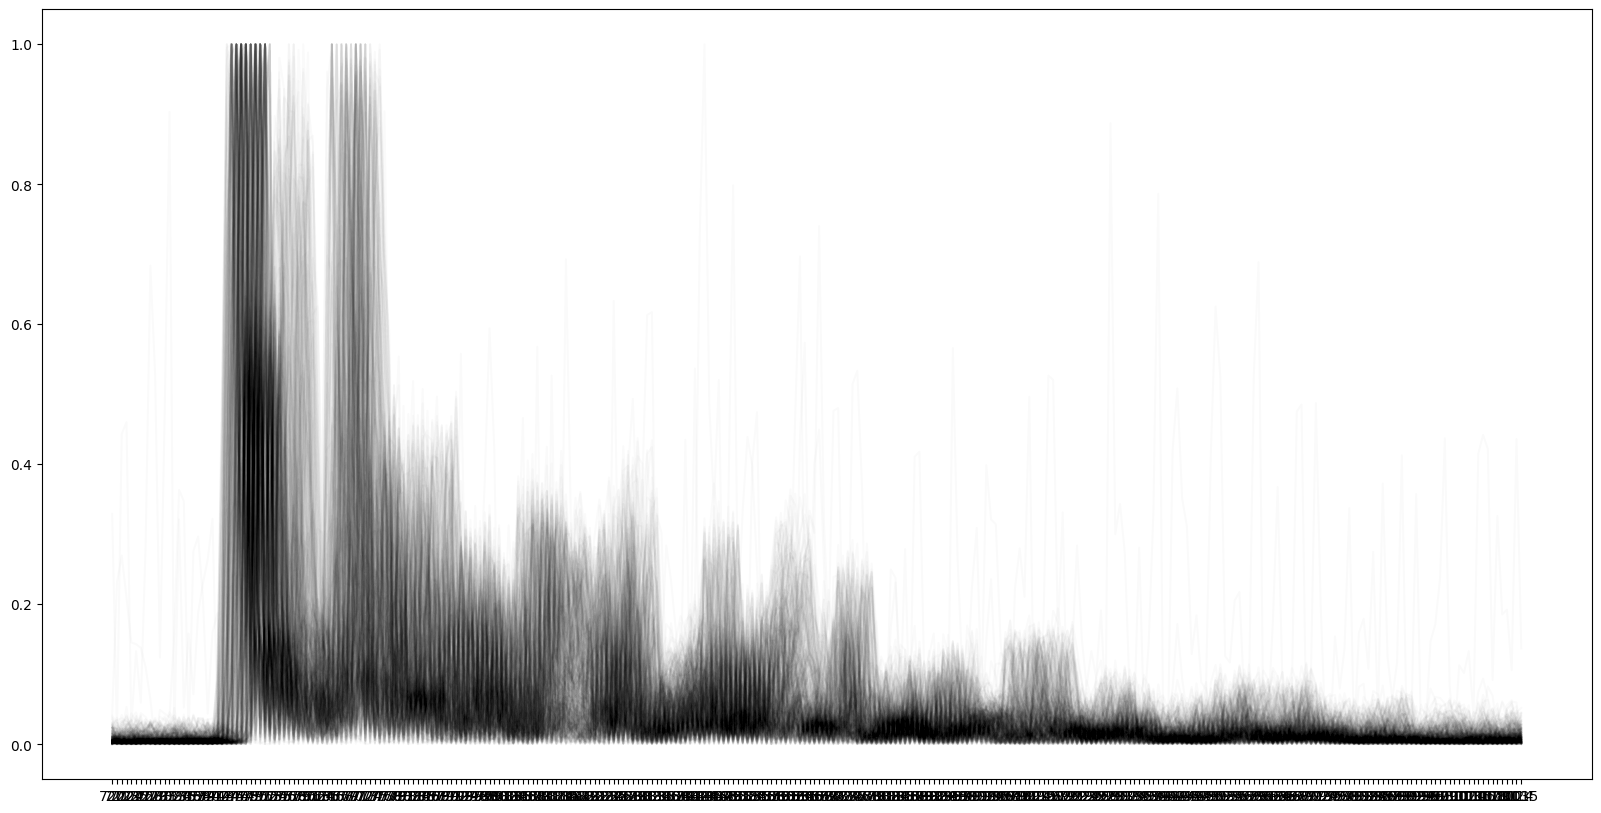

In [46]:
plt.figure(figsize=(20, 10))
for i in range(500):
    plt.plot(ra20.iloc[i][720:], color='black', alpha=0.02, label="ra20")
plt.show()

시점이 너무 안 맞아서, 0.5를 넘는 부분이 시작점으로 맞춰보겠음

In [50]:
# 각 샘플에 대해 0.5를 처음 넘기는 인덱스를 반환
def find_threshold_index(row, threshold=0.5):
    return np.argmax(row > threshold)

In [54]:
# 각 시점이 다른 것을 확인
for i in range(5):
    print(find_threshold_index(ra20.iloc[i]))

750
747
752
756
748


### 오른쪽 상황, Anchor에 가까운 2m, 0m 상황

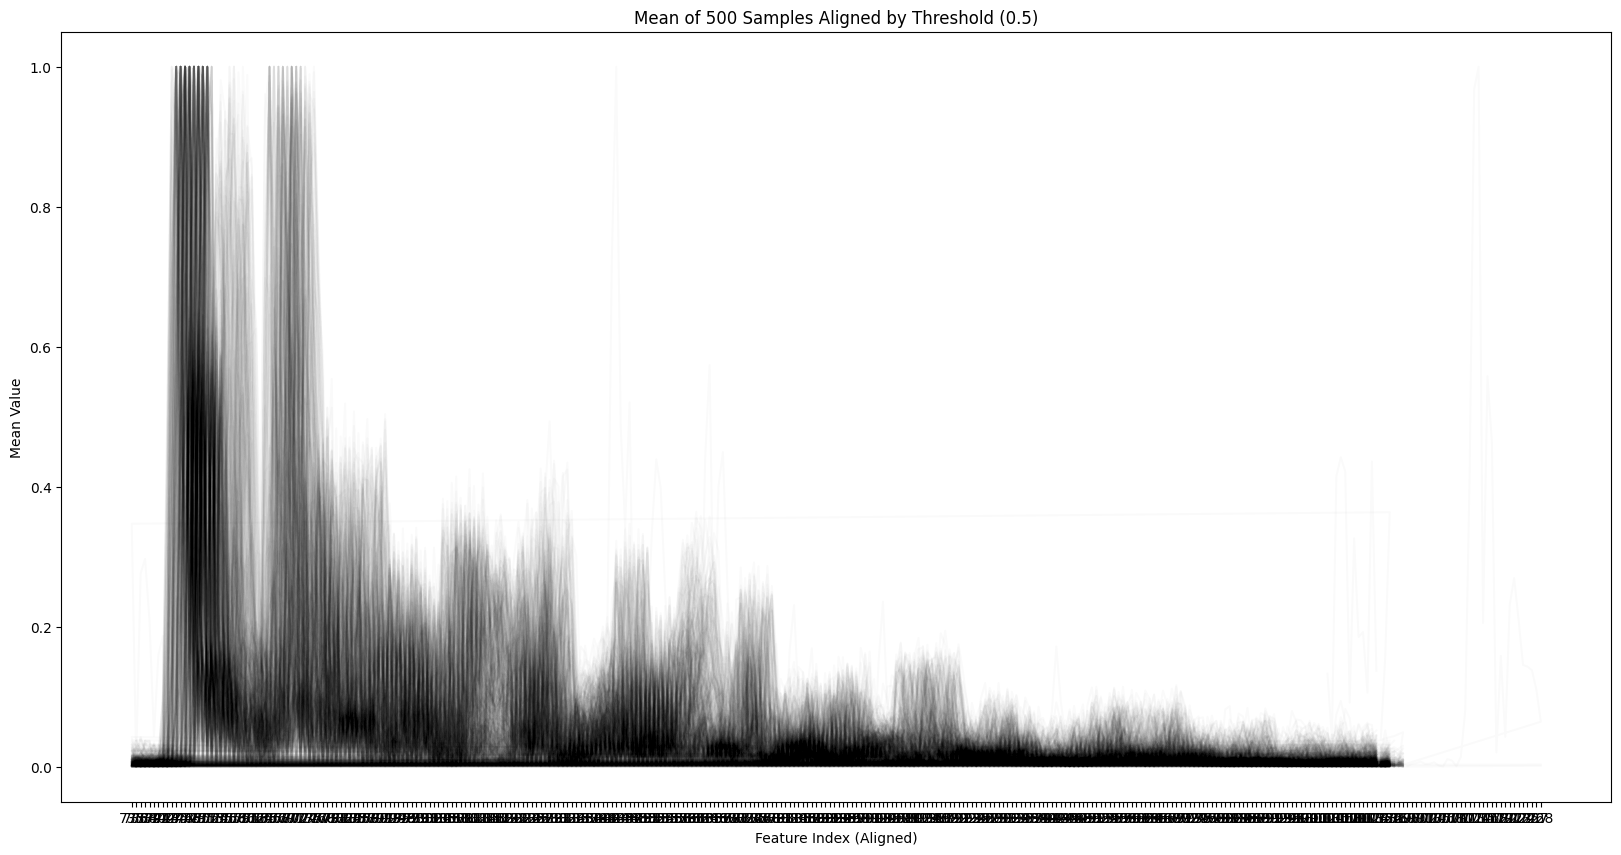

In [61]:
plt.figure(figsize=(20, 10))
for i in range(500):
    start = find_threshold_index(ra20.iloc[i])
    plt.plot(ra20.iloc[i][start-15:], color='black', alpha=0.02, label="ra20")
plt.title('Mean of 500 Samples Aligned by Threshold (0.5)')
plt.xlabel('Feature Index (Aligned)')
plt.ylabel('Mean Value')
plt.show()

### 오른쪽 상황, Tag에 가까운 2m, 0m 상황

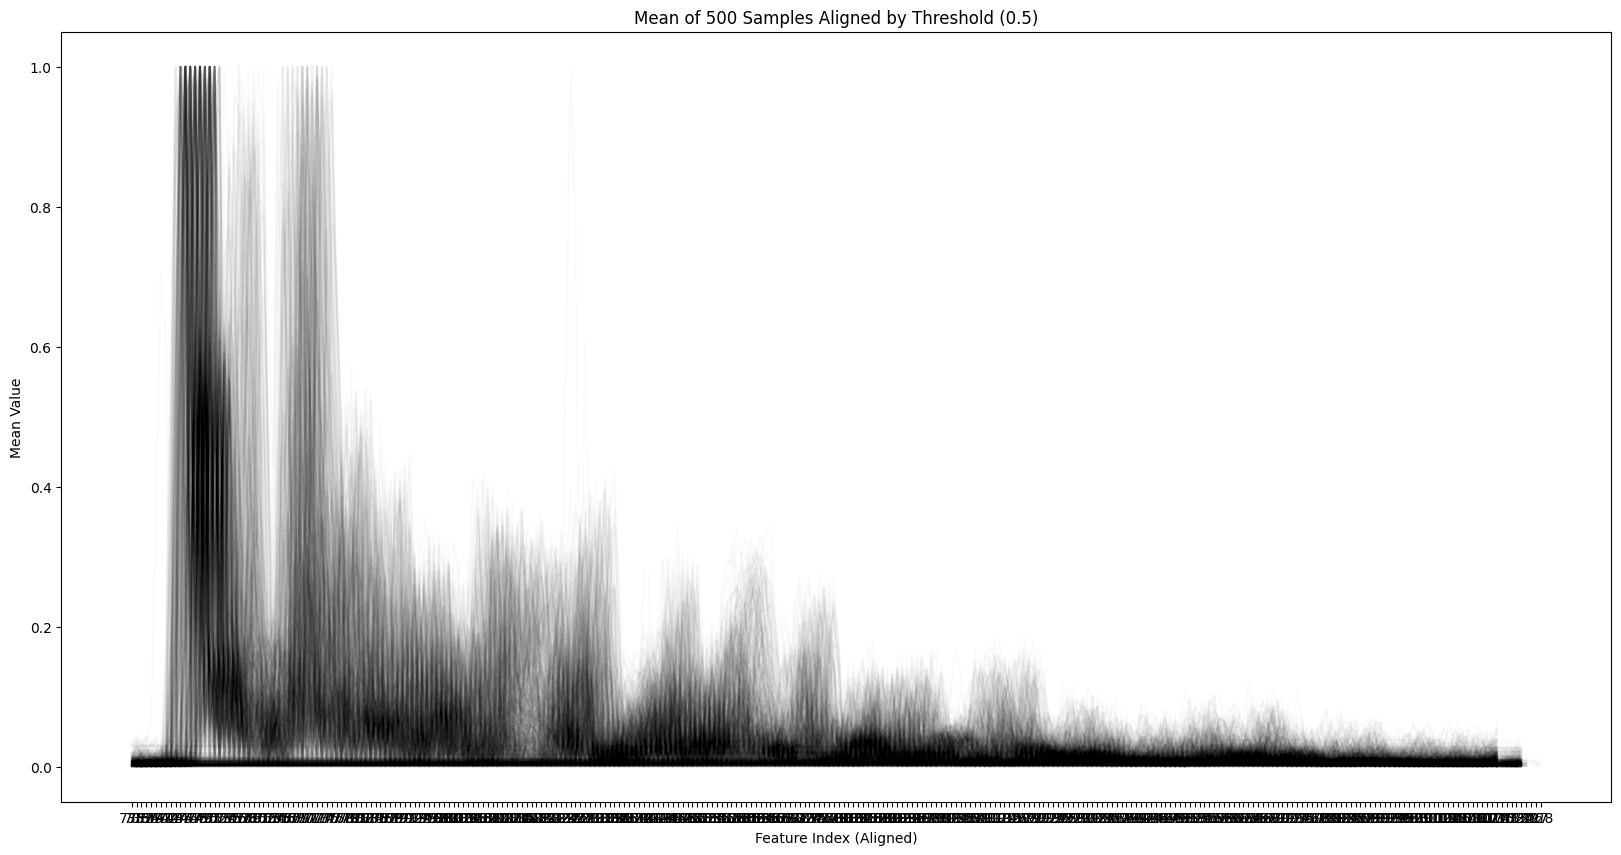

In [67]:
plt.figure(figsize=(20, 10))
for i in range(500):
    start = find_threshold_index(rt20.iloc[i])
    plt.plot(rt20.iloc[i][start-15:], color='black', alpha=0.02, label="ra20")
plt.title('Mean of 500 Samples Aligned by Threshold (0.5)')
plt.xlabel('Feature Index (Aligned)')
plt.ylabel('Mean Value')
plt.show()

## 500개 평균 시각화

### 오른쪽 상황, Anchor에 가까운 2m, 0m 상황

<Axes: >

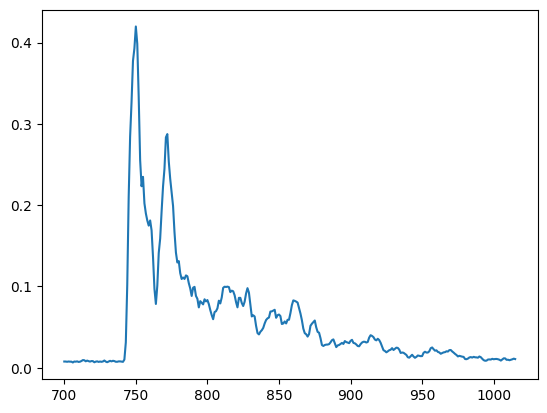

In [64]:
mean_ra20 = ra20.mean()
mean_ra20[700:].plot()

### 오른쪽 상황, Tag에 가까운 2m, 0m 상황

<Axes: >

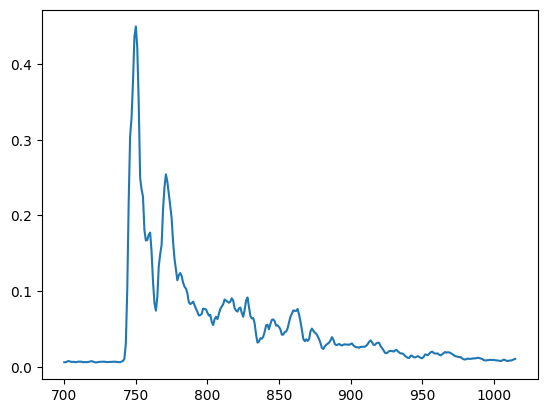

In [66]:
mean_rt20 = rt20.mean()
mean_rt20[700:].plot()

중첩한 image

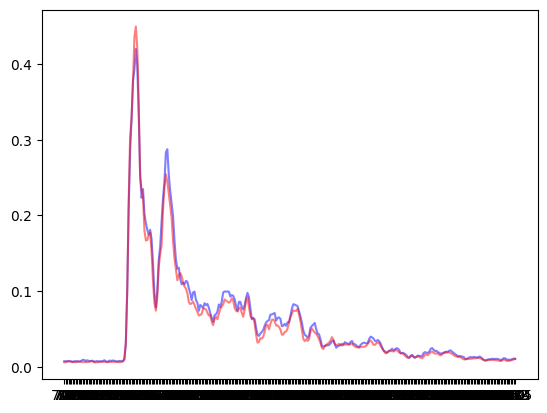

In [73]:
plt.plot(mean_ra20[700:], color='blue', alpha=0.5, label='ra20')
plt.plot(mean_rt20[700:], color='red', alpha=0.5, label='rt20')
plt.show()

### 오른쪽 상황에서 Anchor에 가까운 : 2m 0m인 상황 vs 2m 1.5m인 상황 겹쳐보기  
가설에 의하면 두 부분의 multi path 경로의 길이의 합이 서로 다르기 때문에 cir data 상에서 차이가 있어야한다.|

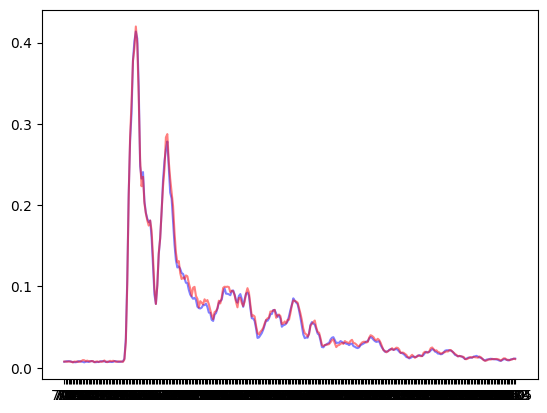

In [74]:
mean_ra215 = ra215.mean()
plt.plot(mean_ra215[700:], color='blue', alpha=0.5, label='ra215')
plt.plot(mean_ra20[700:], color='red', alpha=0.5, label='ra20')
plt.show()

### 아무것도 없느 상황과 ra20상황

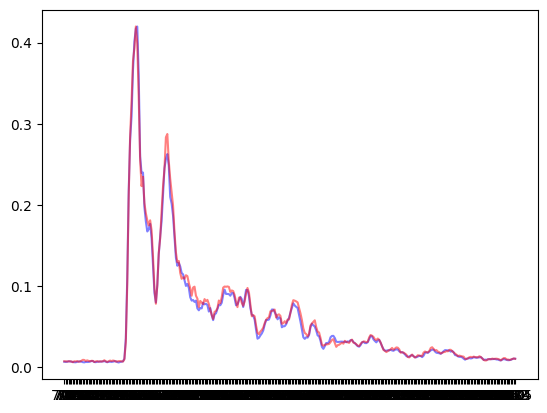

In [75]:
mean_empty = empty.mean()
plt.plot(mean_empty[700:], color='blue', alpha=0.5, label='empty')
plt.plot(mean_ra20[700:], color='red', alpha=0.5, label='ra20')